In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

In [3]:
raw = pd.read_csv('../../../../../datasets/paris_listings.csv')
df = raw.copy()


# 슈퍼호스트 결측치 제거(5%미만)
- 84397  =>  84306
# 리뷰수 = 0 제거
- (리뷰수 =  0 > 리뷰 점수 x > 얻을 수 있는게 없음)
- 84306  =>  58744 


In [4]:
df = df[['id', 'host_id','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
})

df['url'] = raw['listing_url']

df['숙소_가격']


0        $250.00
1        $140.00
2        $107.00
3        $200.00
4            NaN
          ...   
84392     $80.00
84393    $167.00
84394     $98.00
84395    $296.00
84396     $71.00
Name: 숙소_가격, Length: 84397, dtype: object

In [5]:
# 슈퍼호스트, 리뷰수 결측치 제거
print(f"처음 df : {len(df)}")
df = df[~df['슈퍼호스트'].isnull()]
print(f"슈퍼호스트 제거 : {len(df)}")
df = df[df['리뷰수']!=0]
print(f"리뷰수 제거 : {len(df)}")

처음 df : 84397
슈퍼호스트 제거 : 84306
리뷰수 제거 : 58744


#  숙소가격 null값인 경우
- 숙소가격 null 개수 : 16993
- 욕실수 :  16951    90퍼 이상
- 침실수 :  4963     25퍼 정도
- 침대수 :  16951    90퍼 이상

+ => 숙소 가격 결측치 정하면 => 얘네도 해야함 => 크롤링?

나머지는 5%미만

In [6]:
print(f"숙소가격 null 개수 : {df['숙소_가격'].isnull().sum()}")

숙소가격 null 개수 : 16993


In [7]:
df[df['숙소_가격'].isnull()].isnull().sum()

숙소_id              0
호스트_id             0
슈퍼호스트              0
숙소_수               0
숙소_지역              0
숙소_유형              0
수용인원수              0
욕실수            16951
침실수             4963
침대수            16951
편의시설               0
숙소_가격          16993
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수               0
숙소_정확성_리뷰점수        9
숙소_청결도_리뷰점수        7
숙소_체크인_리뷰점수       16
숙소_소통_리뷰점수         8
숙소_위치_리뷰점수        14
숙소_가격_리뷰점수        15
평균_리뷰수             0
url                0
dtype: int64

# 숙소가격 값 있는 경우
-  41751개
- 전부 5%미만 제거 가능
+ 숙소 가격 할인전 금액으로 해야함
+ 30일 이상 한 것들은 월 단위로 함 

In [8]:
len(df[~df['숙소_가격'].isnull()])

41751

In [9]:
df[~df['숙소_가격'].isnull()].isnull().sum()

숙소_id           0
호스트_id          0
슈퍼호스트           0
숙소_수            0
숙소_지역           0
숙소_유형           0
수용인원수           0
욕실수            10
침실수            45
침대수            83
편의시설            0
숙소_가격           0
최소_숙박일          0
최대_숙박일          0
리뷰수             0
30일_리뷰수         0
리뷰점수            0
숙소_정확성_리뷰점수    25
숙소_청결도_리뷰점수    23
숙소_체크인_리뷰점수    27
숙소_소통_리뷰점수     24
숙소_위치_리뷰점수     26
숙소_가격_리뷰점수     30
평균_리뷰수          0
url             0
dtype: int64

# 숙소_지역 별 가격

In [10]:
df['숙소_지역'].unique()

array(['Observatoire', 'Temple', 'Hôtel-de-Ville', 'Entrepôt', 'Bourse',
       'Popincourt', 'Louvre', 'Buttes-Montmartre', 'Buttes-Chaumont',
       'Opéra', 'Batignolles-Monceau', 'Passy', 'Élysée', 'Vaugirard',
       'Ménilmontant', 'Panthéon', 'Gobelins', 'Reuilly', 'Luxembourg',
       'Palais-Bourbon'], dtype=object)

# 달러 확인하기 귀찮음(계속 환율 계산)
- 오늘 날짜 기준 환율과 비교  1달러 = 1365.38원 
- (가격 비교하기 위해서)

C:\Users\ciw96\AppData\Local\Temp\ipykernel_28308\3610708051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check1['숙소_가격'] = check1['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\ciw96\AppData\Local\Temp\ipykernel_28308\3610708051.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check1['숙소_가격'] = check1['숙소_가격']*1365.38


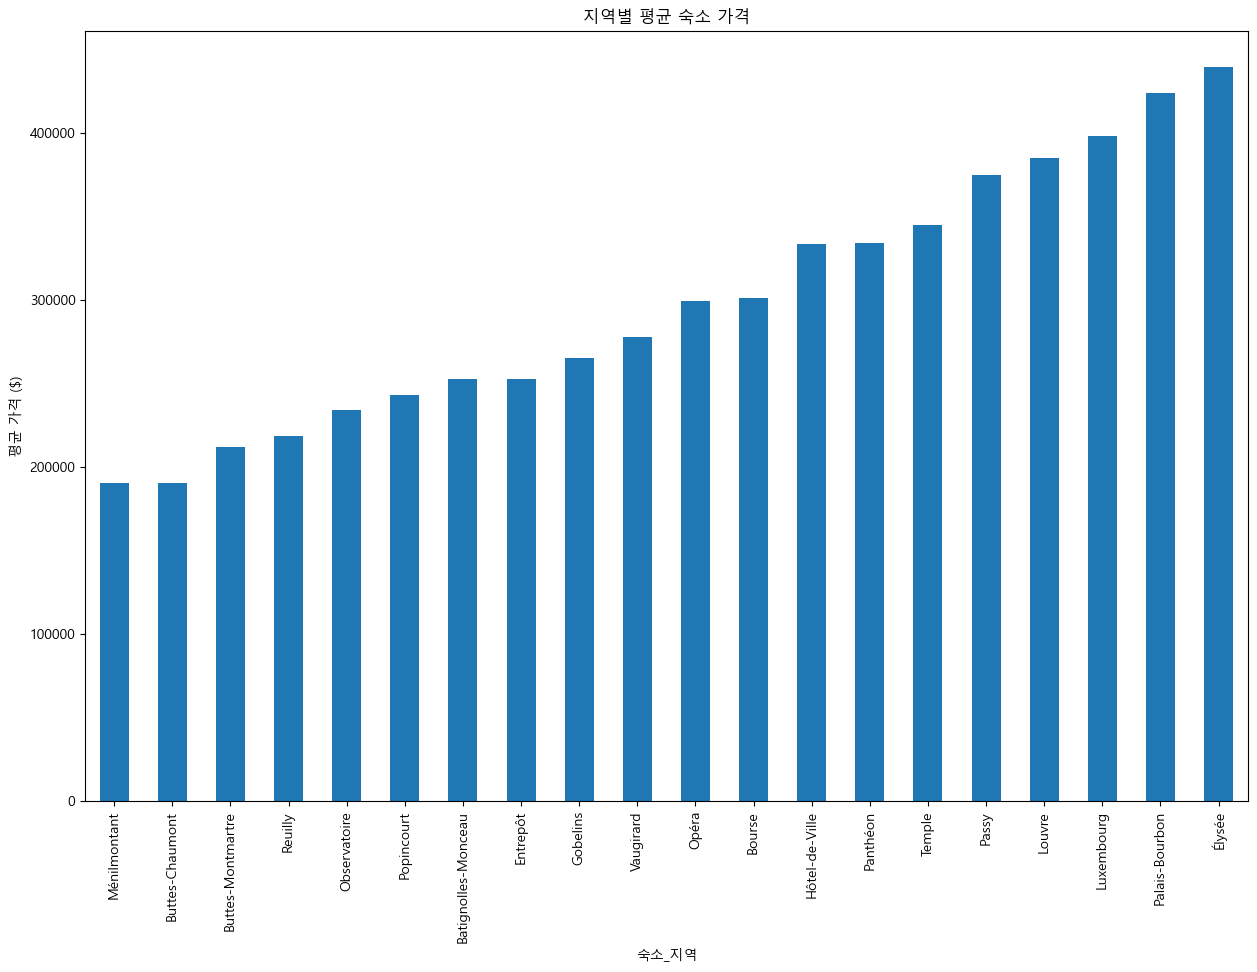

In [11]:
#숙소가격 null값 제거
check1= df[~df['숙소_가격'].isnull()]

#가격 앞 통화기호 제거
check1['숙소_가격'] = check1['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)
check1['숙소_가격'] = check1['숙소_가격']*1365.38

# 지역별 평균 가격 계산
average_prices = check1.groupby('숙소_지역')['숙소_가격'].mean().sort_values().round(2)

# 평균 가격 시각화
plt.figure(figsize=(15, 10))
average_prices.plot(kind='bar')
plt.title('지역별 평균 숙소 가격')
plt.ylabel('평균 가격 ($)')
plt.show()

In [12]:
print(f" 숙소 지역 평균 가격 \n{average_prices}")


 숙소 지역 평균 가격 
숙소_지역
Ménilmontant           189986.83
Buttes-Chaumont        190109.86
Buttes-Montmartre      211876.33
Reuilly                218649.60
Observatoire           233714.31
Popincourt             243128.57
Batignolles-Monceau    252357.34
Entrepôt               252494.28
Gobelins               265340.23
Vaugirard              277454.93
Opéra                  299243.15
Bourse                 300730.48
Hôtel-de-Ville         333281.84
Panthéon               333891.45
Temple                 344851.69
Passy                  374662.24
Louvre                 384684.72
Luxembourg             398188.31
Palais-Bourbon         423936.69
Élysée                 439005.20
Name: 숙소_가격, dtype: float64


In [13]:
average_prices = check1.groupby('숙소_유형')['숙소_가격'].mean().sort_values().round(2)
print(f" 숙소 유형 평균 가격 \n{average_prices}")


 숙소 유형 평균 가격 
숙소_유형
Shared room        103222.73
Private room       198600.36
Entire home/apt    290543.91
Hotel room         374761.52
Name: 숙소_가격, dtype: float64


# Anova분석 (숙소_가격, 숙소_지역)
- 결과 : 관계있음

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA 모델 적합
model = ols('숙소_가격 ~ 숙소_지역', data=check1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# ANOVA 결과 출력
print(anova_table)


                sum_sq       df         F         PR(>F)
숙소_지역     2.057956e+14     19.0  28.38907  1.499881e-101
Residual  1.592173e+16  41731.0       NaN            NaN


# Anova분석 (숙소_가격,숙소_유형)
- 결과 : 관계있음

In [15]:
# ANOVA 모델 적합
model = ols('숙소_가격 ~ 숙소_유형', data=check1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# ANOVA 결과 출력
print(anova_table)

                sum_sq       df          F        PR(>F)
숙소_유형     3.849976e+13      3.0  33.299087  1.733753e-21
Residual  1.608902e+16  41747.0        NaN           NaN


# 지역 + 유형 별 가격 평균
- 생각보다 차이 많이 남

In [16]:
check1.groupby(['숙소_지역','숙소_유형'])['숙소_가격'].mean().sort_values().round(2)

숙소_지역            숙소_유형          
Temple           Shared room          59021.65
Buttes-Chaumont  Shared room          64529.05
Popincourt       Shared room          65297.29
Observatoire     Shared room          67358.75
Reuilly          Shared room          80557.42
                                       ...    
Élysée           Entire home/apt     453436.46
Palais-Bourbon   Hotel room          474655.74
Vaugirard        Hotel room          483492.13
Temple           Hotel room          505418.16
Bourse           Hotel room         1073530.03
Name: 숙소_가격, Length: 79, dtype: float64

In [17]:
check1[check1['숙소_유형'] == 'Shared room']

,숙소_id,호스트_id,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용인원수,욕실수,침실수,침대수,...,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,url
463,566511,2782865,f,2.0,Hôtel-de-Ville,Shared room,1,1.0,1.0,2.0,...,0,4.77,4.71,4.78,4.85,4.86,4.96,4.75,3.38,https://www.airbnb.com/rooms/566511
1113,1154909,6329419,t,2.0,Opéra,Shared room,1,1.0,1.0,4.0,...,4,4.88,4.91,4.76,4.95,4.96,4.97,4.85,3.19,https://www.airbnb.com/rooms/1154909
1265,1232867,6723343,t,1.0,Bourse,Shared room,3,1.0,1.0,2.0,...,2,4.95,4.93,4.93,4.95,5.00,5.00,4.91,6.85,https://www.airbnb.com/rooms/1232867
1336,1249964,6811343,t,1.0,Louvre,Shared room,2,1.0,1.0,1.0,...,7,4.87,4.90,4.80,4.97,4.98,4.95,4.83,8.06,https://www.airbnb.com/rooms/1249964
1664,1616064,3155873,t,2.0,Hôtel-de-Ville,Shared room,4,1.0,1.0,1.0,...,0,4.75,4.71,4.81,4.81,4.74,4.92,4.52,0.42,https://www.airbnb.com/rooms/1616064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70725,1032972642062843827,264290202,f,19.0,Temple,Shared room,1,1.0,1.0,1.0,...,0,5.00,4.00,5.00,5.00,5.00,5.00,5.00,0.31,https://www.airbnb.com/rooms/1032972642062843827
70922,1034009890652747484,34974824,f,4.0,Vaugirard,Shared room,1,1.0,1.0,0.0,...,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.28,https://www.airbnb.com/rooms/1034009890652747484
72755,1046088669887689272,264290202,f,19.0,Temple,Shared room,1,0.5,1.0,1.0,...,3,4.67,4.67,4.22,5.00,4.89,4.89,4.56,4.50,https://www.airbnb.com/rooms/1046088669887689272
79642,1086981066297567719,530677675,t,10.0,Popincourt,Shared room,1,1.0,1.0,6.0,...,2,5.00,5.00,4.50,5.00,5.00,5.00,5.00,2.00,https://www.airbnb.com/rooms/1086981066297567719


In [18]:
# 상위 10개 데이터 확인용
top_10_details = check1.loc[check1['숙소_가격'].sort_values(ascending=False).head(10).index, ['숙소_id', '숙소_가격', 'url']]


# 가격 확인 결과 
 
23285448 없음

873142104727787209 : 없음

644744645250321094 : 다름

36624656 : 다름


+ 월별, 일별 나오는거 해결?


In [19]:
top_10_details

,숙소_id,숙소_가격,url
27548,36624656,72691465.82,https://www.airbnb.com/rooms/36624656
24552,32740447,25731951.48,https://www.airbnb.com/rooms/32740447
53850,873142104727787209,21708176.62,https://www.airbnb.com/rooms/873142104727787209
43061,650613932629146572,20480700.00,https://www.airbnb.com/rooms/650613932629146572
39408,557849127896979136,15838408.00,https://www.airbnb.com/rooms/557849127896979136
19014,23285448,14881276.62,https://www.airbnb.com/rooms/23285448
28126,37250543,13653800.00,https://www.airbnb.com/rooms/37250543
42631,644744645250321094,13653800.00,https://www.airbnb.com/rooms/644744645250321094
14576,17250002,13653800.00,https://www.airbnb.com/rooms/17250002
25955,34663834,13653800.00,https://www.airbnb.com/rooms/34663834


In [20]:
check1['숙소_유형'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [21]:
check1[check1['숙소_유형']=='Shared room'][['침대수','침실수','욕실수']]

,침대수,침실수,욕실수
463,2.0,1.0,1.0
1113,4.0,1.0,1.0
1265,2.0,1.0,1.0
1336,1.0,1.0,1.0
1664,1.0,1.0,1.0
...,...,...,...
70725,1.0,1.0,1.0
70922,0.0,1.0,1.0
72755,1.0,1.0,0.5
79642,6.0,1.0,1.0


In [22]:
check1.isnull().sum()

숙소_id           0
호스트_id          0
슈퍼호스트           0
숙소_수            0
숙소_지역           0
숙소_유형           0
수용인원수           0
욕실수            10
침실수            45
침대수            83
편의시설            0
숙소_가격           0
최소_숙박일          0
최대_숙박일          0
리뷰수             0
30일_리뷰수         0
리뷰점수            0
숙소_정확성_리뷰점수    25
숙소_청결도_리뷰점수    23
숙소_체크인_리뷰점수    27
숙소_소통_리뷰점수     24
숙소_위치_리뷰점수     26
숙소_가격_리뷰점수     30
평균_리뷰수          0
url             0
dtype: int64

- 숙소_가격 9999 두개 다 없음

- 7000달러 은 실제 값 맞음 

- 이상함 => 전체 데이터 확인

In [30]:
check1[check1['리뷰수']>200]['url']

2                      https://www.airbnb.com/rooms/5396
6                      https://www.airbnb.com/rooms/7397
14                    https://www.airbnb.com/rooms/43055
17                   https://www.airbnb.com/rooms/171159
31                   https://www.airbnb.com/rooms/185575
                              ...                       
40184    https://www.airbnb.com/rooms/585159385315596245
40215    https://www.airbnb.com/rooms/588907740662525672
44759    https://www.airbnb.com/rooms/680285180819253563
53778    https://www.airbnb.com/rooms/872865253220746862
57100    https://www.airbnb.com/rooms/912078904400274601
Name: url, Length: 1241, dtype: object

In [24]:
check1[check1['최소_숙박일'] >= 30][['숙소_id', 'url', '숙소_가격','최소_숙박일']].sort_values(by='숙소_가격', ascending=False).head(20)

,숙소_id,url,숙소_가격,최소_숙박일
39408,557849127896979136,https://www.airbnb.com/rooms/557849127896979136,15838408.00,178
58328,922908836897208560,https://www.airbnb.com/rooms/922908836897208560,13652434.62,360
45489,700517256594925331,https://www.airbnb.com/rooms/700517256594925331,13652434.62,360
18005,21752738,https://www.airbnb.com/rooms/21752738,12001690.20,90
141,245715,https://www.airbnb.com/rooms/245715,9557660.00,365
5036,5814961,https://www.airbnb.com/rooms/5814961,6144210.00,30
4905,5389821,https://www.airbnb.com/rooms/5389821,5461520.00,365
49268,786745995701336717,https://www.airbnb.com/rooms/786745995701336717,4369216.00,30
21560,27020497,https://www.airbnb.com/rooms/27020497,4096140.00,30
1574,1575999,https://www.airbnb.com/rooms/1575999,3813506.34,365


# 실제 값 확인 
- 36624656  : 53239.0 >  140 달러   => 연단위인듯? 1년 단위는 확인 못함
- 49621582	: 9999.0 > 227달러      => 한달?
- 650613932629146572 : 15000.0 > 390 달러  => 한달?
- 644744645250321094 : 10000.0 > 380 달러  => 한달?

- 32740447  : 예약 못함

- 873142104727787209 : 없음
- 23285448 : 없음
- 922908836897208560 : 없음
- 942601205380131462 : 없음
- -----------------------------------------------------------------
- 17250002 : 맞음
- 34663834 : 맞음
- 38403989 : 맞음
- 44218823 : 맞음
- 37250543 : 맞음
- 808535416806333679 : 맞음
- 557849127896979136 : 맞음
- 705497985789497932 : 맞음
- 835963399185156883 : 맞음
- 752040291810643820 : 맞음
- 1014335639818006967 : 맞음


In [25]:
check1[['숙소_id','숙소_유형', 'url', '숙소_가격','최소_숙박일']].sort_values(by='숙소_가격', ascending=False).head(20)

,숙소_id,숙소_유형,url,숙소_가격,최소_숙박일
27548,36624656,Entire home/apt,https://www.airbnb.com/rooms/36624656,72691465.82,1
24552,32740447,Entire home/apt,https://www.airbnb.com/rooms/32740447,25731951.48,5
53850,873142104727787209,Entire home/apt,https://www.airbnb.com/rooms/873142104727787209,21708176.62,1
43061,650613932629146572,Entire home/apt,https://www.airbnb.com/rooms/650613932629146572,20480700.00,4
39408,557849127896979136,Entire home/apt,https://www.airbnb.com/rooms/557849127896979136,15838408.00,178
19014,23285448,Private room,https://www.airbnb.com/rooms/23285448,14881276.62,1
28126,37250543,Entire home/apt,https://www.airbnb.com/rooms/37250543,13653800.00,2
42631,644744645250321094,Entire home/apt,https://www.airbnb.com/rooms/644744645250321094,13653800.00,3
14576,17250002,Entire home/apt,https://www.airbnb.com/rooms/17250002,13653800.00,2
25955,34663834,Entire home/apt,https://www.airbnb.com/rooms/34663834,13653800.00,3


# 연단위 확인

In [26]:
check1[check1['최소_숙박일'] >= 366][['숙소_id', 'url', '숙소_가격','최소_숙박일']].sort_values(by='숙소_가격', ascending=False)

,숙소_id,url,숙소_가격,최소_숙박일
22264,28100121,https://www.airbnb.com/rooms/28100121,456036.92,500
14819,17691509,https://www.airbnb.com/rooms/17691509,189787.82,1000
13080,14573284,https://www.airbnb.com/rooms/14573284,163845.60,370
2405,2707348,https://www.airbnb.com/rooms/2707348,136538.00,400
329,535068,https://www.airbnb.com/rooms/535068,116057.30,500
2158,2227962,https://www.airbnb.com/rooms/2227962,95576.60,400
34988,49443150,https://www.airbnb.com/rooms/49443150,66903.62,1123


# 1차 정리
- 숙소_지역, 숙소_유형은 숙소_가격과 관계가 있다
- 같은 지역, 같은 유형이여도 가격 차이가 많이 난다
- 숙소 가격 있는건 결측치 제거 가능
- 숙소 가격 null  (침대,침실,욕실수 같은 다른 것들)  결측치 너무 많음 => 어떻게 처리할지 이야기 해야함

+--------------------------------------------------------------------------------------+
- 전체 데이터에서 확인 결과 
  - 지금은 존재하지 않는 데이터 확인 
    - 어떻게 할지 이야기 하나하나 확인? 어려움
    - 그냥 쓰자니 연단위, 월단위 확인 불가
  - 30일 넘어가면 에어비엔비에서 월단위로 바뀜
  - ex) https://www.airbnb.com/rooms/38403989
  - 연단위 확인 결과	

+ 여기서 문제가 최소_숙박일로 확인 불가
  - 최소_숙박일이 하루여도 30일 넘게 등록하면 월단위로 넘어감
  - 단 30일 넘어가는 것들은 월단위 가능할듯 => 확인 결과 x
  - ex) https://www.airbnb.com/rooms/43995613
  - d
  


1. 월간, 일간 => 일간 단위로 통일해야하는데 기준을 모르겠음... 
2. shared house => 한 사람 단위로 해야하는데 건물단위여서 어떻게 계산할지
3. 가격 처리 => 다른 null값들 어떻게 처리할 것인지 ? 

In [27]:
len(check1[check1['숙소_가격']>=10000.0])

41751

In [28]:
len(check1[check1['숙소_가격']>=1000.0])

41751